#### 1. Documentación del Código: Visualización del Clima en las Ciudades más Pobladas de Perú 
El propósito de este código es obtener y mostrar los datos meteorológicos actuales de las ciudades más pobladas de Perú utilizando la API de OpenWeatherMap. Los datos obtenidos incluyen temperatura, presión atmosférica, humedad, velocidad del viento y una descripción del clima.

In [1]:
# Una mejor visualización del aspectos más peculiares de las ciudades más influyentes
import requests

# Tu API Key de OpenWeatherMap
api_key = "6561b87688acfa117cbae61afb8d4adc"
lang='es'

# Lista de las ciudades más pobladas de Perú
cities = ["Lima", "Arequipa", "Trujillo", "Chiclayo", "Piura", "Iquitos", "Cusco", "Chimbote", "Huancayo", "Tacna"]

# Diccionario para almacenar los datos de la API
datos_api = {}

# URL base de la API de OpenWeatherMap para obtener el clima actual
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Función para obtener los datos meteorológicos de una ciudad
def get_weather_data(city_name, api_key):
    complete_url = f"{base_url}q={city_name}&appid={api_key}&lang={lang}&units=metric"
    try:
        response = requests.get(complete_url)
        response.raise_for_status()
        data = response.json()
        
        if data["cod"] != "404":
            main = data.get("main", {})
            wind = data.get("wind", {})
            weather = data.get("weather", [{}])[0]

            # Extraer datos relevantes
            temperature = main.get("temp", "N/A")
            pressure = main.get("pressure", "N/A")
            humidity = main.get("humidity", "N/A")
            wind_speed = wind.get("speed", "N/A")
            weather_description = weather.get("description", "N/A")
            
            # Almacenar los datos en el diccionario
            datos_api[city_name] = {
                "Temperatura": temperature,
                "Presión At.": pressure,
                "Humedad": humidity,
                "Velocidad Viento": wind_speed,
                "Descripción clima": weather_description
            }

            # Mostrar los datos
            print(f"Ciudad: {city_name}")
            print(f"Temperatura: {temperature}°C")
            print(f"Presión At.: {pressure} hPa")
            print(f"Humedad: {humidity}%")
            print(f"Velocidad Viento: {wind_speed} m/s")
            print(f"Descripción clima: {weather_description}")
            print("-" * 40)
        else:
            print(f"Error: {data.get('message', 'City Not Found!')} for city {city_name}")
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred for city {city_name}: {http_err}")
    except Exception as err:
        print(f"Other error occurred for city {city_name}: {err}")

# Obtener datos meteorológicos para cada ciudad en la lista
for city in cities:
    get_weather_data(city, api_key)


Ciudad: Lima
Temperatura: 16.74°C
Presión At.: 1014 hPa
Humedad: 84%
Velocidad Viento: 4.63 m/s
Descripción clima: niebla
----------------------------------------
Ciudad: Arequipa
Temperatura: 15.04°C
Presión At.: 1018 hPa
Humedad: 24%
Velocidad Viento: 5.14 m/s
Descripción clima: cielo claro
----------------------------------------
Ciudad: Trujillo
Temperatura: 16.98°C
Presión At.: 1013 hPa
Humedad: 88%
Velocidad Viento: 3.6 m/s
Descripción clima: niebla
----------------------------------------
Ciudad: Chiclayo
Temperatura: 17.97°C
Presión At.: 1012 hPa
Humedad: 82%
Velocidad Viento: 6.69 m/s
Descripción clima: cielo claro
----------------------------------------
Ciudad: Piura
Temperatura: 20.46°C
Presión At.: 1012 hPa
Humedad: 71%
Velocidad Viento: 7.16 m/s
Descripción clima: algo de nubes
----------------------------------------
Ciudad: Iquitos
Temperatura: 25.02°C
Presión At.: 1013 hPa
Humedad: 88%
Velocidad Viento: 0 m/s
Descripción clima: cielo claro
-----------------------------

#### 2. Documentación del Código: Extracción y Visualización de Datos Climáticos de Weather.com
Este código tiene como objetivo obtener y mostrar información meteorológica actualizada para las ciudades más pobladas de Perú. Utilizando la API de OpenWeatherMap, el código recupera datos como la temperatura, la presión atmosférica, la humedad, la velocidad del viento y una descripción general del clima. Esta información es esencial para comprender las condiciones meteorológicas actuales en diferentes regiones del país y puede ser útil para diversos fines, como la planificación de viajes, la agricultura, y la gestión de recursos.

In [2]:
import requests
from bs4 import BeautifulSoup

# URL del sitio web de Weather.com para Lima, Perú
url2 = "https://weather.com/weather/today/l/PEXX0001:1:PE" #Arequipa
url1 = "https://weather.com/weather/today/l/ee766efb4312bc35562051c0302bb8feb94ba7e3007deef881ee4266476cf8b8" #Lima
url3 = "https://weather.com/weather/today/l/238ec220a7e1e46b1c93460ef63eeb9a9d73a1d03664beaa3996adb113fff1d2" #Trujillo
url4 = "https://weather.com/weather/today/l/7a7e7cc17dd14936688be56a73c2c6b1526b9593b8e3f49c2bff018546babf0a" #Chiclayo
url5 = "https://weather.com/weather/today/l/3455c369fb28be57a0cb61ec39c361fad00aa960c90f92f80575fd11baf2ee36" #Piura
url6 = "https://weather.com/weather/today/l/9be520b7b5247b3f0a0dfd2daae6606aa56229b0e789b06463d607e6d6a20f01" #Iquitos
url7 = "https://weather.com/weather/today/l/3455c369fb28be57a0cb61ec39c361fad00aa960c90f92f80575fd11baf2ee36" #Cusco
url8 = "https://weather.com/weather/today/l/1ad077b51e3dd9e37317818dadd718513fe1c1c0ac0471141a00897b1586e376" #Chimbote
url9 = "https://weather.com/weather/today/l/571d1bf349f6f01aaa55a40097ac7bb460a0589672c03e0dce5ecf471a1364ad" #Huancayo
url10 = "https://weather.com/weather/today/l/1d129679098f9b673202b758186a31e63625f0ac34b9bc194c128f1b764fae12" #Tacna
URL = [url1,url2,url3,url4,url5,url6,url7,url8,url9,url10]
ciudades = ["Lima","Arequipa","Trujillo","Chiclayo","Piura","Iquitos","Cusco","Chimbote","Huancayo","Tacna"]
datos_clima = {}

# Realizar la solicitud GET para cada URL
for i in range(len(URL)):
    url = URL[i]
    ciudad = ciudades[i]
    response = requests.get(url)
    if response.status_code == 200:
        # Parsear el contenido HTML de la respuesta
        soup = BeautifulSoup(response.content, "html.parser")

        # Buscar y extraer índice UV
        uv_value_section = soup.find('span', {'data-testid': 'UVIndexValue'})
        uv_index = uv_value_section.text if uv_value_section else "No disponible"

        # Buscar y extraer sensación térmica
        feels_like_label = soup.find('span', {'data-testid': 'FeelsLikeLabel'})
        feels_like_value = feels_like_label.find_next('span', {'data-testid': 'TemperatureValue'}) if feels_like_label else None
        feels_like = feels_like_value.text if feels_like_value else "No disponible"
       
        # Convertir la sensación térmica a Celsius si no está "No disponible"
        if feels_like != "No disponible":
            feels_like_fahrenheit = float(feels_like.replace('°', ''))
            feels_like_celsius = (feels_like_fahrenheit - 32) * 5 / 9
            feels_like = f"{feels_like_celsius:.1f}°C"

        # Buscar y extraer visibilidad
        visibility_section = soup.find('span', {'data-testid': 'VisibilityValue'})
        visibility = visibility_section.text if visibility_section else "No disponible"

        # Almacenar los datos en el diccionario
        datos_clima[ciudad] = {
            "Índice UV": uv_index,
            "Sensación Térmica": feels_like,
            "Visibilidad": visibility
        }
    else:
        print(f"Error al acceder al sitio web para {ciudad}: {response.status_code}")

# Imprimir los datos de manera estructurada
for ciudad, datos in datos_clima.items():
    print(f"Datos climáticos de {ciudad}:")
    print(f"Índice UV: {datos['Índice UV']}")
    print(f"Sensación Térmica: {datos['Sensación Térmica']}")
    print(f"Visibilidad: {datos['Visibilidad']}")
    print("-" * 40)

Datos climáticos de Lima:
Índice UV: 0 of 11
Sensación Térmica: 15.0°C
Visibilidad: 3 mi
----------------------------------------
Datos climáticos de Arequipa:
Índice UV: 0 of 11
Sensación Térmica: 12.8°C
Visibilidad: 6 mi
----------------------------------------
Datos climáticos de Trujillo:
Índice UV: 0 of 11
Sensación Térmica: 16.7°C
Visibilidad: 3 mi
----------------------------------------
Datos climáticos de Chiclayo:
Índice UV: 0 of 11
Sensación Térmica: 17.2°C
Visibilidad: 6 mi
----------------------------------------
Datos climáticos de Piura:
Índice UV: 0 of 11
Sensación Térmica: 20.0°C
Visibilidad: 6 mi
----------------------------------------
Datos climáticos de Iquitos:
Índice UV: 0 of 11
Sensación Térmica: 25.0°C
Visibilidad: 6 mi
----------------------------------------
Datos climáticos de Cusco:
Índice UV: 0 of 11
Sensación Térmica: 20.0°C
Visibilidad: 6 mi
----------------------------------------
Datos climáticos de Chimbote:
Índice UV: 0 of 11
Sensación Térmica: 16.7°

#### 3. Documentación del Código: Combinación de Datos Climáticos de API y Web Scraping
Este bloque de código combina la información climática obtenida de dos fuentes diferentes: la API de OpenWeatherMap y el scraping del sitio web Weather.com. El objetivo es crear un diccionario consolidado con datos más completos y detallados sobre las condiciones climáticas de varias ciudades de Perú. La información combinada se muestra de manera estructurada para facilitar su comprensión.

In [3]:
# Ahora combinamos dato de la API y web scraping
# Diccionario final para almacenar los datos combinados
datos_combinados = {}

# Integrar datos de la API y el web scraping
for ciudad in cities:
    datos_combinados[ciudad] = {
        "Temperatura": datos_api.get(ciudad, {}).get("Temperatura", "No disponible"),
        "Presión": datos_api.get(ciudad, {}).get("Presión At.", "No disponible"),
        "Humedad": datos_api.get(ciudad, {}).get("Humedad", "No disponible"),
        "Velocidad del Viento": datos_api.get(ciudad, {}).get("Velocidad Viento", "No disponible"),
        "Descripción del Clima": datos_api.get(ciudad, {}).get("Descripción clima", "No disponible"),
        "Índice UV": datos_clima.get(ciudad, {}).get("Índice UV", "No disponible"),
        "Sensación Térmica": datos_clima.get(ciudad, {}).get("Sensación Térmica", "No disponible"),
        "Visibilidad": datos_clima.get(ciudad, {}).get("Visibilidad", "No disponible")
    }

# Imprimir los datos combinados
for ciudad, datos in datos_combinados.items():
    print(f"Datos climáticos de {ciudad}:")
    print(f"Temperatura: {datos['Temperatura']}°C")
    print(f"Presión: {datos['Presión']} hPa")
    print(f"Humedad: {datos['Humedad']}%")
    print(f"Velocidad del Viento: {datos['Velocidad del Viento']} m/s")
    print(f"Descripción del Clima: {datos['Descripción del Clima']}")
    print(f"Índice UV: {datos['Índice UV']}")
    print(f"Sensación Térmica: {datos['Sensación Térmica']}°C")
    print(f"Visibilidad: {datos['Visibilidad']} km")
    print("-" * 40)



Datos climáticos de Lima:
Temperatura: 16.74°C
Presión: 1014 hPa
Humedad: 84%
Velocidad del Viento: 4.63 m/s
Descripción del Clima: niebla
Índice UV: 0 of 11
Sensación Térmica: 15.0°C°C
Visibilidad: 3 mi km
----------------------------------------
Datos climáticos de Arequipa:
Temperatura: 15.04°C
Presión: 1018 hPa
Humedad: 24%
Velocidad del Viento: 5.14 m/s
Descripción del Clima: cielo claro
Índice UV: 0 of 11
Sensación Térmica: 12.8°C°C
Visibilidad: 6 mi km
----------------------------------------
Datos climáticos de Trujillo:
Temperatura: 16.98°C
Presión: 1013 hPa
Humedad: 88%
Velocidad del Viento: 3.6 m/s
Descripción del Clima: niebla
Índice UV: 0 of 11
Sensación Térmica: 16.7°C°C
Visibilidad: 3 mi km
----------------------------------------
Datos climáticos de Chiclayo:
Temperatura: 17.97°C
Presión: 1012 hPa
Humedad: 82%
Velocidad del Viento: 6.69 m/s
Descripción del Clima: cielo claro
Índice UV: 0 of 11
Sensación Térmica: 17.2°C°C
Visibilidad: 6 mi km
----------------------------

#### 4. Documentación del Código: Integración y Visualización de Datos Climáticos en un DataFrame
Este bloque de código tiene como objetivo combinar información climática obtenida de la API de OpenWeatherMap y del scraping del sitio web Weather.com, para luego organizar estos datos en un DataFrame de pandas. Esto permite una visualización tabular clara y ordenada de las condiciones climáticas en varias ciudades de Perú.

In [4]:
import pandas as pd

# Diccionario final para almacenar los datos combinados
datos_combinados = {}

# Integrar datos de la API y el web scraping
for ciudad in cities:
    datos_combinados[ciudad] = {
        "Temperatura": datos_api.get(ciudad, {}).get("Temperatura", "No disponible"),
        "Presión": datos_api.get(ciudad, {}).get("Presión At.", "No disponible"),
        "Humedad %": datos_api.get(ciudad, {}).get("Humedad", "No disponible"),
        "Velocidad del Viento": datos_api.get(ciudad, {}).get("Velocidad Viento", "No disponible"),
        "Descripción del Clima": datos_api.get(ciudad, {}).get("Descripción clima", "No disponible"),
        "Índice UV": datos_clima.get(ciudad, {}).get("Índice UV", "No disponible"),
        "Sensación Térmica": datos_clima.get(ciudad, {}).get("Sensación Térmica", "No disponible"),
        "Visibilidad": datos_clima.get(ciudad, {}).get("Visibilidad", "No disponible")
    }

# Crear un DataFrame a partir del diccionario datos_combinados
df = pd.DataFrame.from_dict(datos_combinados, orient='index')

# Mostrar el DataFrame
print("Datos climáticos combinados:")
df


Datos climáticos combinados:


,Temperatura,Presión,Humedad %,Velocidad del Viento,Descripción del Clima,Índice UV,Sensación Térmica,Visibilidad
Lima,16.74,1014,84,4.63,niebla,0 of 11,15.0°C,3 mi
Arequipa,15.04,1018,24,5.14,cielo claro,0 of 11,12.8°C,6 mi
Trujillo,16.98,1013,88,3.60,niebla,0 of 11,16.7°C,3 mi
Chiclayo,17.97,1012,82,6.69,cielo claro,0 of 11,17.2°C,6 mi
Piura,20.46,1012,71,7.16,algo de nubes,0 of 11,20.0°C,6 mi
Iquitos,25.02,1013,88,0.00,cielo claro,0 of 11,25.0°C,6 mi
Cusco,11.13,1019,58,2.06,cielo claro,0 of 11,20.0°C,6 mi
Chimbote,18.14,1013,84,4.01,muy nuboso,0 of 11,16.7°C,8 mi
Huancayo,10.41,1019,77,1.54,algo de nubes,0 of 11,10.0°C,9 mi
Tacna,12.11,1017,76,1.03,nubes,0 of 11,12.2°C,6 mi


#### 5. Documentación del Código: Exportación de Datos Climáticos a un Archivo CSV
Este bloque de código tiene como objetivo exportar la información climática combinada, almacenada en un DataFrame de pandas, a un archivo CSV. Esto permite que los datos sean fácilmente accesibles y compartibles en un formato estándar.

In [5]:
# Pasar la información recolectada a un CSV 
df['Ciudad'] = df.index
df = df.reset_index(drop=True)
df = df[['Ciudad', 'Temperatura', 'Presión', 'Humedad %', 'Velocidad del Viento', 'Descripción del Clima', 'Índice UV', 'Sensación Térmica', 'Visibilidad']]
df.to_csv('archivo.csv', index=False, sep=',', encoding='utf-8')

#### 6. Visualizacion de algunos parametros de los climas mediante graficos y mapas

##### 6.1 Gráfico para temperaturas actuales

##### 6.1 Gráfico para temperaturas actuales

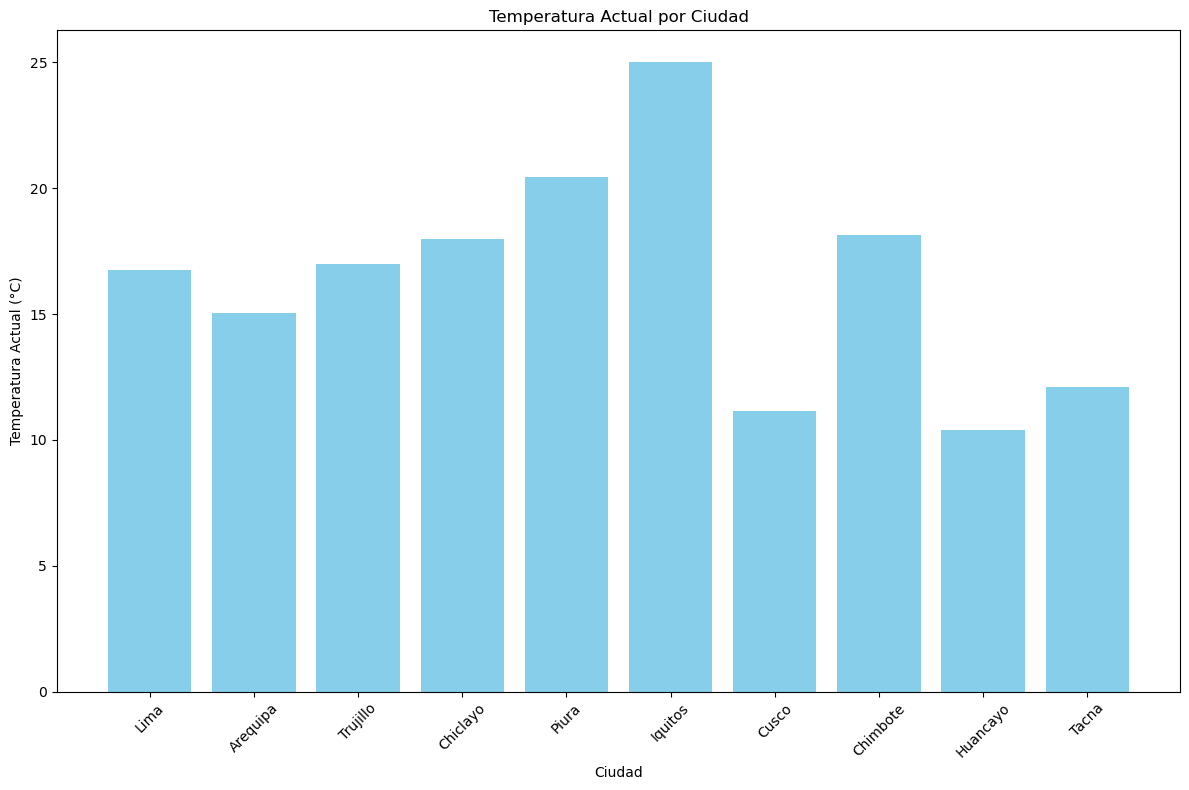

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV donde tienes las temperaturas actuales, asegurando que el índice son las ciudades
df = pd.read_csv('archivo.csv', sep=',', encoding='utf-8', index_col=0)  # Asegurándote de que el índice sea la primera columna (ciudades)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
plt.bar(df.index, df['Temperatura'], color='skyblue')  # Usando el índice como etiquetas y la columna 'Temperatura' para los valores

# Añadir título y etiquetas
plt.title('Temperatura Actual por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Temperatura Actual (°C)')

# Personalizar etiquetas del eje x con los nombres de las ciudades
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()


##### 6.2 Mapa para sensación térmica

In [91]:
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Ejemplo de datos de sensación térmica por ciudad
data = {
    'ciudad': ["Lima", "Arequipa", "Trujillo", "Chiclayo", "Piura", "Iquitos", "Cusco", "Chimbote", "Huancayo", "Tacna"],
    'sensacion_termica': [16.1, 14.4, 17.2, 17.2, 22.2, 28.9, 22.2, 16.1, 11.7, 12.2]
}
df = pd.DataFrame(data)

# Configurar un user_agent personalizado para Nominatim
user_agent = "MiAppDeMapas/1.0"
geolocator = Nominatim(user_agent=user_agent)

def obtener_coordenadas(ciudad):
    try:
        location = geolocator.geocode(ciudad)
        if location:
            return (location.latitude, location.longitude)
        else:
            return None
    except:
        return None

# Obtener las coordenadas geográficas (latitud y longitud) de cada ciudad
df['coordenadas'] = df['ciudad'].apply(obtener_coordenadas)

# Preparar los datos para el mapa de calor
heat_data = [[row['coordenadas'][0], row['coordenadas'][1], row['sensacion_termica']] for index, row in df.iterrows()]

# Crear un mapa centrado en América Latina
mapa = folium.Map(location=[-14.23, -51.92], zoom_start=3)

# Agregar el mapa de calor
HeatMap(heat_data, radius=15).add_to(mapa)

# Guardar el mapa como archivo HTML
mapa.save('mapa_calor_sensacion_termica.html')

# Mostrar el mapa 
from IPython.display import IFrame
display(IFrame('mapa_calor_sensacion_termica.html', width=800, height=600))
